<a href="https://www.kaggle.com/code/aisuko/image-generation-by-using-diffusers?scriptVersionId=161864789" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Overview

In this notebook, we will generate some pictures by using Stable Diffusion model.

In [1]:
!pip install diffusers==0.23.1
!pip install compel==2.0.2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 29.6 MB/s eta 0:00:00


# Animagine XL

It is a high-resolution, latent text-to-image diffusion model. The model has been fine-tuned using a learning rate of 4e-7 over 27000 global steps with a batch size of 16 on a curated dataset of superior-quality animes-style images. And it is derived from Stable Dissuion XL 1.0.

In [2]:
import torch

torch.__version__

'2.1.2'

In [3]:
from torch import autocast
from diffusers import StableDiffusionXLPipeline, EulerAncestralDiscreteScheduler

model="Linaqruf/animagine-xl"

pipe= StableDiffusionXLPipeline.from_pretrained(
    model,
#     device_map='auto',
    torch_dtype=torch.float16,
    use_safetensors=True,
    variant="fp16"
)

pipe.scheduler = EulerAncestralDiscreteScheduler.from_config(pipe.scheduler.config)

# optimization

# Offload the model to the CPU for out-of-memory errors
pipe.enable_model_cpu_offload()

# Will cause the error https://github.com/huggingface/diffusers/issues/5934
# pipe.unet=torch.compile(pipe.unet, mode='reduce-overhead', fullgraph=True) # PyTorch>=2.0

# pipe.enable_xformers_memory_efficient_attention() # PyTorch<2.0

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

model_index.json:   0%|          | 0.00/582 [00:00<?, ?B/s]

Fetching 18 files:   0%|          | 0/18 [00:00<?, ?it/s]

scheduler/scheduler_config.json:   0%|          | 0.00/479 [00:00<?, ?B/s]

model.fp16.safetensors:   0%|          | 0.00/1.39G [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/560 [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/737 [00:00<?, ?B/s]

model.fp16.safetensors:   0%|          | 0.00/246M [00:00<?, ?B/s]

text_encoder_2/config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

tokenizer_2/tokenizer_config.json:   0%|          | 0.00/725 [00:00<?, ?B/s]

tokenizer_2/special_tokens_map.json:   0%|          | 0.00/460 [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

tokenizer_2/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/1.71k [00:00<?, ?B/s]

diffusion_pytorch_model.fp16.safetensors:   0%|          | 0.00/5.14G [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/607 [00:00<?, ?B/s]

diffusion_pytorch_model.fp16.safetensors:   0%|          | 0.00/167M [00:00<?, ?B/s]

tokenizer_2/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

2024-02-06 04:13:45.915351: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-06 04:13:45.915487: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-06 04:13:46.046078: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


  0%|          | 0/50 [00:00<?, ?it/s]

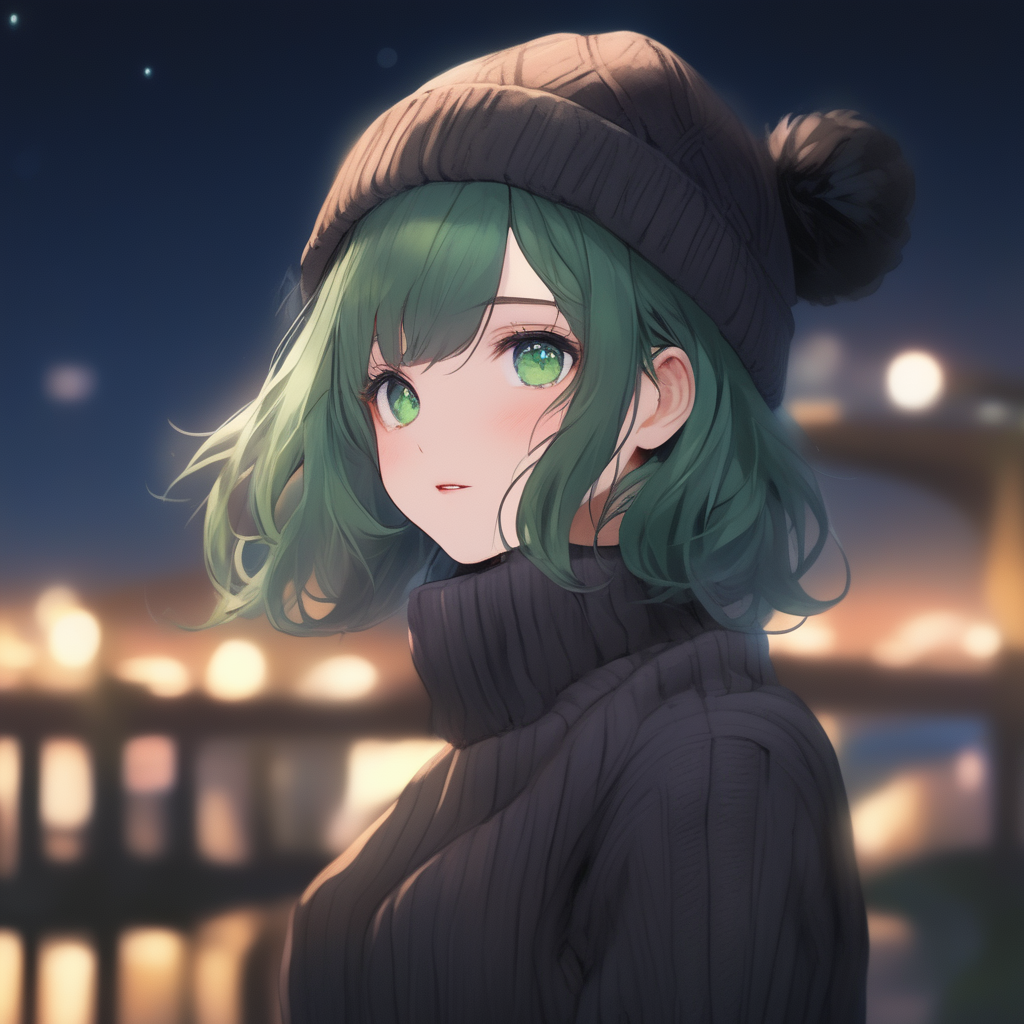

In [4]:
from compel import Compel

prompt="face focus, cute, masterpiece, best quality, 1girl, green hair, sweater, looking at viewer, upper body, beanie, outdoors, night, turtleneck"
negative_prompt="lowres, bad anatomy, bad hands, text, error, missing fingers, extra digit, fewer digits, cropped, worst quality, low quality, normal quality, jpeg artifacts, signature, watermark, username, blurry"

embedding=False
if embedding:
    (prompt_embeds, negative_prompt_embeds, pooled_prompt_embeds, negative_pooled_prompt_embeds
    )=pipe.encode_prompt(prompt,'cuda',num_images_per_prompt=1)
    
    image=pipe(
        prompt_embeds=prompt_embeds,
        pooled_prompt_embeds=pooled_prompt_embeds,
        negative_prompt_embeds=negative_prompt_embeds,
        negative_pooled_prompt_embeds=negative_pooled_prompt_embeds,
        width=1024,
        height=1024,
        guifance_scale=12,
        target_size=(1024,1024),
        original_size=(4096,4096),
        num_inference_steps=50).images[0]
else:
    image=pipe(
        prompt=prompt,
        negative_prompt=negative_prompt,
        width=1024,
        height=1024,
        guifance_scale=12,
        target_size=(1024,1024),
        original_size=(4096,4096),
        num_inference_steps=50).images[0]

image.save("anime_girl.png")

image

# PixArt-Alpha

PixArt-Alphs is a Transformer-based text-to-image diffusion model taht rivals the quality of the existing state-of-the-art ones, such as Stable Diffusion XL, Imagen, and DALL-E 2, while being more efficient.

It has a maximum sequence length of 120. Thus, it allows for more detailed prompt inputs, unlocking better quality generations.

In [5]:
import gc

del pipe
gc.collect()

torch.cuda.empty_cache()

In [6]:
from diffusers import PixArtAlphaPipeline

pipeline_id="PixArt-alpha/PixArt-XL-2-1024-MS"
pipeline=PixArtAlphaPipeline.from_pretrained(
    pipeline_id,
    torch_dtype=torch.float16
)
pipeline.enable_model_cpu_offload()

model_index.json:   0%|          | 0.00/400 [00:00<?, ?B/s]

Fetching 14 files:   0%|          | 0/14 [00:00<?, ?it/s]

scheduler/scheduler_config.json:   0%|          | 0.00/655 [00:00<?, ?B/s]

(…)ext_encoder/model.safetensors.index.json:   0%|          | 0.00/19.9k [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/2.20k [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/788 [00:00<?, ?B/s]

tokenizer/added_tokens.json:   0%|          | 0.00/2.63k [00:00<?, ?B/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/9.99G [00:00<?, ?B/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/9.06G [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/20.5k [00:00<?, ?B/s]

transformer/config.json:   0%|          | 0.00/719 [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/654 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/2.45G [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/5 [00:00<?, ?it/s]

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]


Setting `clean_caption=True` requires the ftfy library but it was not found in your environment. Checkout the instructions on the
installation section: https://github.com/rspeer/python-ftfy/tree/master#installing and follow the ones
that match your environment. Please note that you may need to restart your runtime after installation.

Setting `clean_caption` to False...

Setting `clean_caption=True` requires the ftfy library but it was not found in your environment. Checkout the instructions on the
installation section: https://github.com/rspeer/python-ftfy/tree/master#installing and follow the ones
that match your environment. Please note that you may need to restart your runtime after installation.

Setting `clean_caption` to False...


  0%|          | 0/20 [00:00<?, ?it/s]

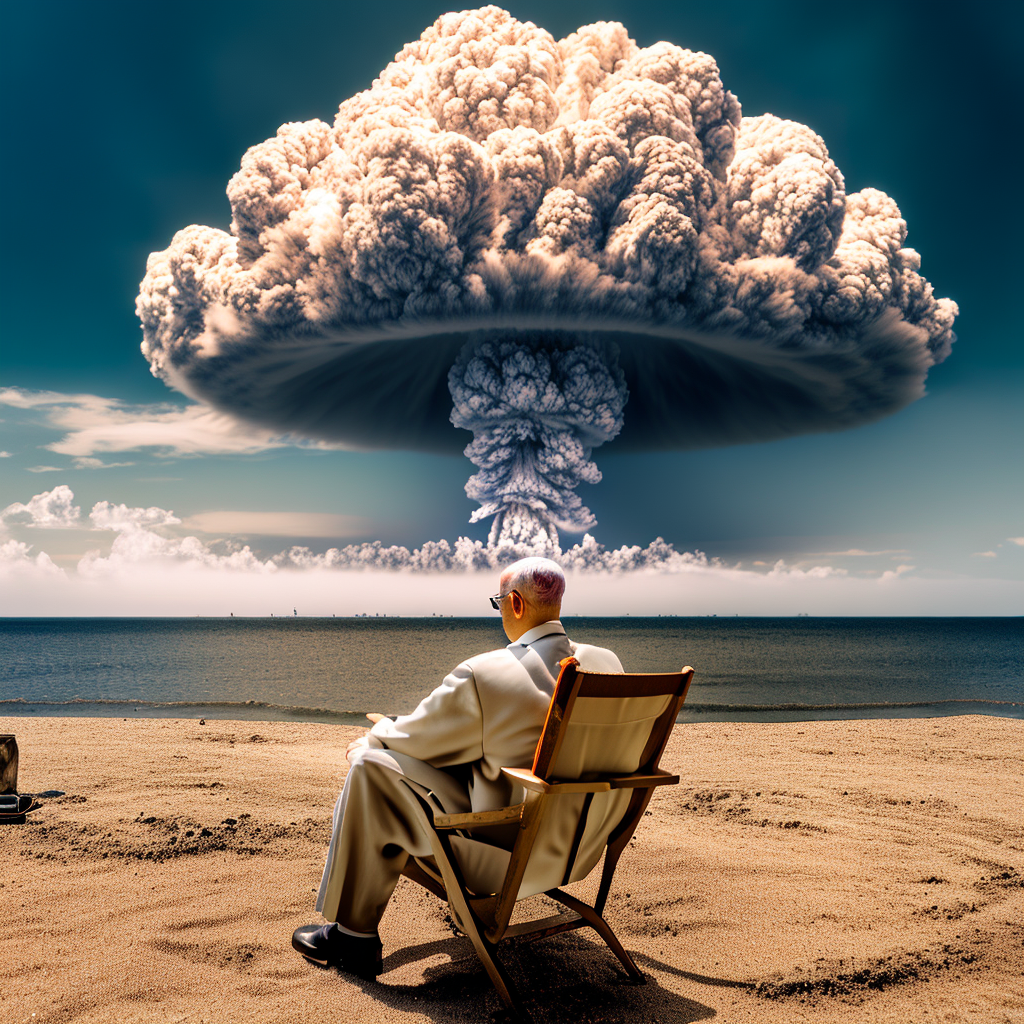

In [7]:
prompt="Oppenheimer sits on the beach on a chair, watching a nuclear exposition with a huge mushroom cloud,120mm"
image=pipeline(prompt).images[0]
image.save("sahara.png")
image

# Conclusion

We get quite same quality of picture from Animagine XL. However, the second one we need to add more steps if we want to get same quality with the example from diffusers project.